In [62]:
import nltk
from nltk.corpus import brown
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Counting frequency distance
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

In [9]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [17]:
# Check number of words for two given genres
word_genre = [(genre, word)
    for genre in ['mystery', 'science_fiction']
    for word in brown.words(categories=genre)]

In [16]:
len(word_genre)

71639

In [23]:
word_genre[:5]

[('mystery', 'There'),
 ('mystery', 'were'),
 ('mystery', 'thirty-eight'),
 ('mystery', 'patients'),
 ('mystery', 'on')]

In [24]:
word_genre[-5:]

[('science_fiction', 'get'),
 ('science_fiction', 'out'),
 ('science_fiction', 'of'),
 ('science_fiction', 'pain'),
 ('science_fiction', '.')]

In [47]:
# Append conditional frequency distance
cfd = nltk.ConditionalFreqDist(word_genre)
cfd.conditions()

['mystery', 'science_fiction']

In [48]:
print(cfd['mystery'])
print(cfd['science_fiction'])

<FreqDist with 6982 samples and 57169 outcomes>
<FreqDist with 3233 samples and 14470 outcomes>


In [49]:
cfd['mystery'].most_common(10)

[('.', 3326),
 (',', 2805),
 ('the', 2573),
 ('to', 1284),
 ('and', 1215),
 ('a', 1136),
 ('of', 903),
 ('was', 820),
 ('``', 740),
 ("''", 738)]

In [50]:
cfd['mystery']['.']

3326

In [56]:
cfd.tabulate(samples=range(10), cumulative=True)

                0 1 2 3 4 5 6 7 8 9 
        mystery 0 0 0 0 0 0 0 0 0 0 
science_fiction 0 0 0 0 0 0 0 0 0 0 


In [67]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
numbers = np.random.randint(10, size=10)

array([4, 2, 5, 5, 1, 3, 7, 4, 5, 3])

                   Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
        mystery         5         7         8         9        11        13        17 
science_fiction         0         0         0         0         0         0         1 
None


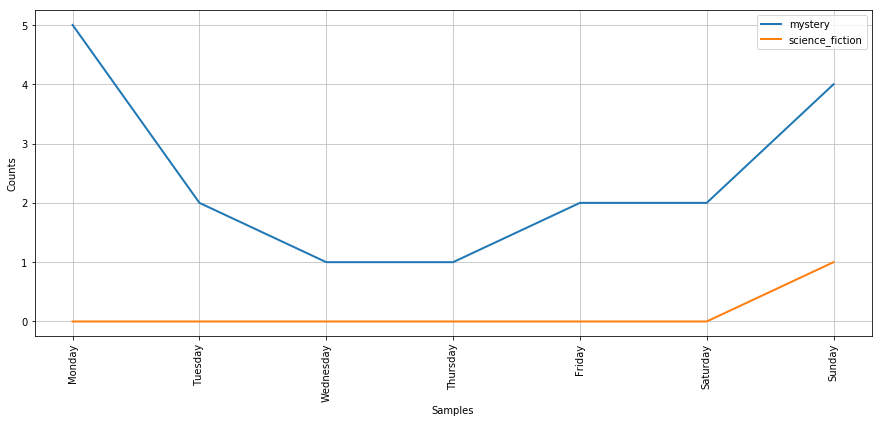

In [61]:
print(cfd.tabulate(samples=days, cumulative=True))
cfd.plot(samples=days)

In [85]:
# Tokenize simple quote
from nltk.tokenize import word_tokenize
faulkner_quote = ('How often have I lain beneath rain on a strange roof, thinking of home.')
faulkner_tokens = word_tokenize(faulkner_quote)
faulkner_tokens

['How',
 'often',
 'have',
 'I',
 'lain',
 'beneath',
 'rain',
 'on',
 'a',
 'strange',
 'roof',
 ',',
 'thinking',
 'of',
 'home',
 '.']

In [86]:
# Get bigrams from tokenized quote
list(nltk.bigrams(faulkner_tokens))[:10]

[('How', 'often'),
 ('often', 'have'),
 ('have', 'I'),
 ('I', 'lain'),
 ('lain', 'beneath'),
 ('beneath', 'rain'),
 ('rain', 'on'),
 ('on', 'a'),
 ('a', 'strange'),
 ('strange', 'roof')]

In [92]:
# Generate simple text using genesis corpus
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [102]:
cfd['one']
#generate_model(cfd, 'god')

FreqDist({'of': 11, 'that': 7, 'to': 5, 'people': 3, 'was': 2, 'language': 2, ',': 2, 'from': 2, 'day': 2, 'night': 2, ...})

In [105]:
generate_model(cfd, 'one')

one of the land of the land of the land of the land of the 

In [107]:
print('Monty Python')

Monty Python
